# EXERCICIO3

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_circles
from scipy.special import expit
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report

In [22]:
np.random.seed(42)


X = np.random.randn(1000, 2)

y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

Y = y

y = y/1.0;

y = y.reshape(len(y), 1)

x = X

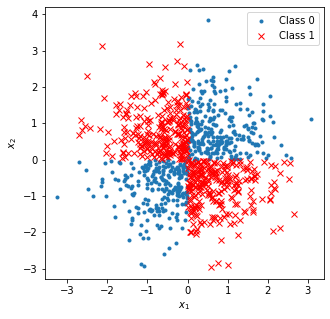

In [5]:

idx0 = np.argwhere(Y == 0)
idx1 = np.argwhere(Y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

**b. Analisando o gráfico do item (a), que tipo de fronteira de decisão seria necessária para separar essas classes (linear ou não-linear)?**

R: Seria necessária uma fronteira de decisão não linear para separar essas duas classes

In [6]:
def error_function(x, a, y):    
    h = expit(x.dot(a))
    error = -(1/len(y))*np.sum( y.T.dot(np.log(h)) + (1-y).T.dot(np.log((1-h) )) )
    return error

def classifier(x, a):
    h = expit(x.dot(a))
    c = np.zeros((len(h), 1))
    for i in range(0, len(h)):
        if(h[i] >= 0.5):
            c[i,0]=1.0
    return c

def predict_prob(x, a):
    h1 = expit(x.dot(a))
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

## ha(x) = f(a0 + a1x1 + a2x2)

In [7]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

x_train = np.c_[np.ones((len(y_train), 1)), x_train]

x_test = np.c_[np.ones((len(y_test), 1)), x_test]

In [8]:
# Batch gradient descent solution.

# learning rate.
alpha = 3.0
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd_v = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train)
Jgd_v[0] = error_function(x_test, a, y_test)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train)
    Jgd_v[iteration+1] = error_function(x_test, a, y_test)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weights for the smallest error ever.
    if(Jgd_v[iteration+1] < minimum_val_error):
        minimum_val_error = Jgd_v[iteration+1]
        a_min = a        
    iteration = iteration + 1

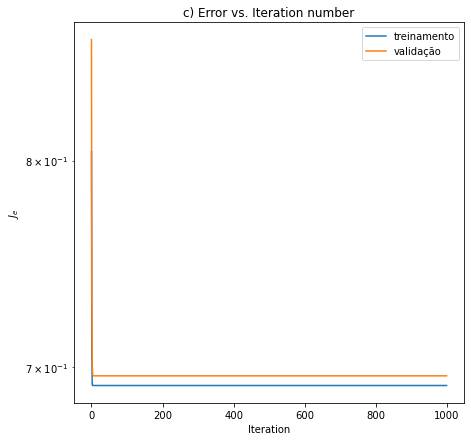

In [9]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
#plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('c) Error vs. Iteration number')
plt.legend()
plt.show()

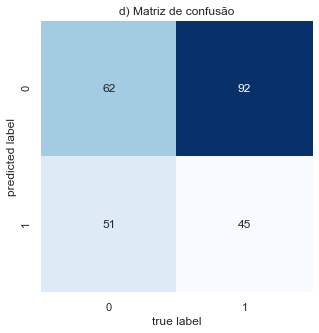

In [10]:
y_pred_class = classifier(x_test, a_min)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('d) Matriz de confusão')
plt.show()

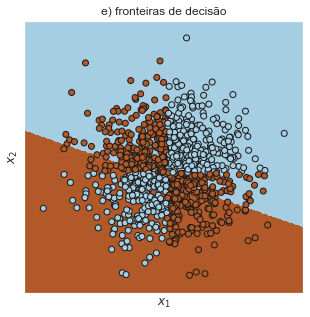

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()], a_min)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('e) fronteiras de decisão')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

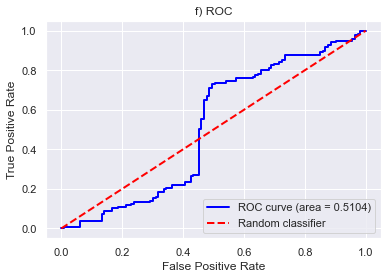

In [12]:

# Getting the probabilities for each class.
y_prob = predict_prob(x_test, a_min)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('f) ROC')
plt.legend(loc="lower right")
plt.show()


In [13]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.40      0.55      0.46       113
         1.0       0.47      0.33      0.39       137

    accuracy                           0.43       250
   macro avg       0.44      0.44      0.43       250
weighted avg       0.44      0.43      0.42       250



# ha(x) = f(a0 + a1x1 + a2x2+ a3x1^2 + a4x2^2)


In [14]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

x_train = np.c_[np.ones((len(y_train), 1)),x_train,x_train**2]

x_test = np.c_[np.ones((len(y_test), 1)), x_test, x_test**2]

In [15]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd_v = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train)
Jgd_v[0] = error_function(x_test, a, y_test)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train)
    Jgd_v[iteration+1] = error_function(x_test, a, y_test)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weights for the smallest error ever.
    if(Jgd_v[iteration+1] < minimum_val_error):
        minimum_val_error = Jgd_v[iteration+1]
        a_min = a        
    iteration = iteration + 1

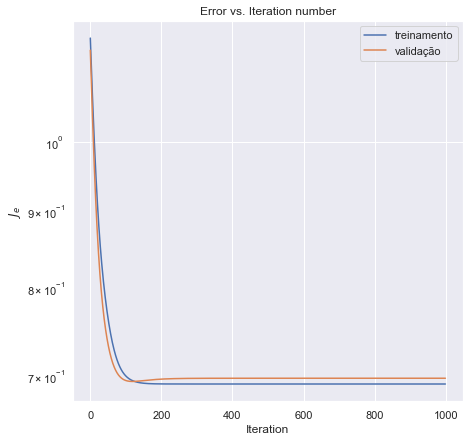

In [16]:

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
#plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

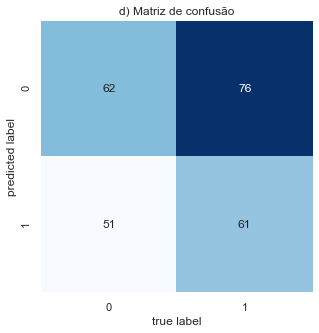

In [17]:

y_pred_class = classifier(x_test, a_min)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('d) Matriz de confusão')
plt.show()

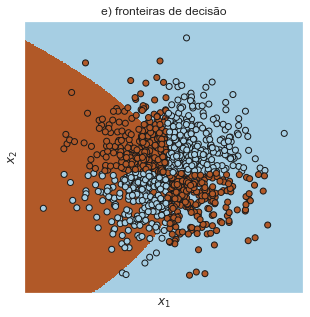

In [18]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2], a_min)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('e) fronteiras de decisão')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

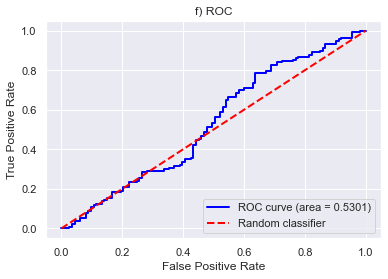

In [19]:
# Getting the probabilities for each class.
y_prob = predict_prob(x_test, a_min)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('f) ROC')
plt.legend(loc="lower right")
plt.show()

In [20]:
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

         0.0       0.45      0.55      0.49       113
         1.0       0.54      0.45      0.49       137

    accuracy                           0.49       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.50      0.49      0.49       250



**j. Qual a diferença na performance do classificador entre as duas funções
hipóteses?**

R: O classificador 2 (não linear) apresenta melhor precisão de classificação (de acordo ao classification report). No entanto, a regressão logística é incapaz de prever correctamente o resultado de uma operação que não é linearmente separável, como é o caso do exercício independentemente do número de polinómios.